In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr, zscore,norm
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
day_df = pd.read_csv('day.csv')
hours_df = pd.read_csv('hour.csv')


In [39]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
#let us quickly do some EDA and Attribute Analysis
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [43]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [44]:
hours_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [45]:
def checkIQR(data):
    print("Attributes for which values lie outside of IQR")
    for field in hours_df.columns:
        if hours_df[field].dtypes == 'int64' or hours_df[field].dtypes == 'float64':
            Q1 = data[field].quantile(0.25)
            Q3 = data[field].quantile(0.75)
            current_iqr = iqr(data[field], rng=(25,75), interpolation='midpoint')
            iqr_analysis = (data[field] < (Q1 - 1.5 * current_iqr)) |(data[field] > (Q3 + 1.5 * current_iqr))
            if (iqr_analysis == True).any() == True:
                print('{field_name} : {flag}'.format(field_name=field,flag=sum(iqr_analysis)))
checkIQR(hours_df)

Attributes for which values lie outside of IQR
holiday : 500
weathersit : 3
hum : 22
windspeed : 342
casual : 1192
registered : 680
cnt : 505


Question is are the above variable really have outliers or they can be an estimator!

We will proceed forward without making any changes and see the result


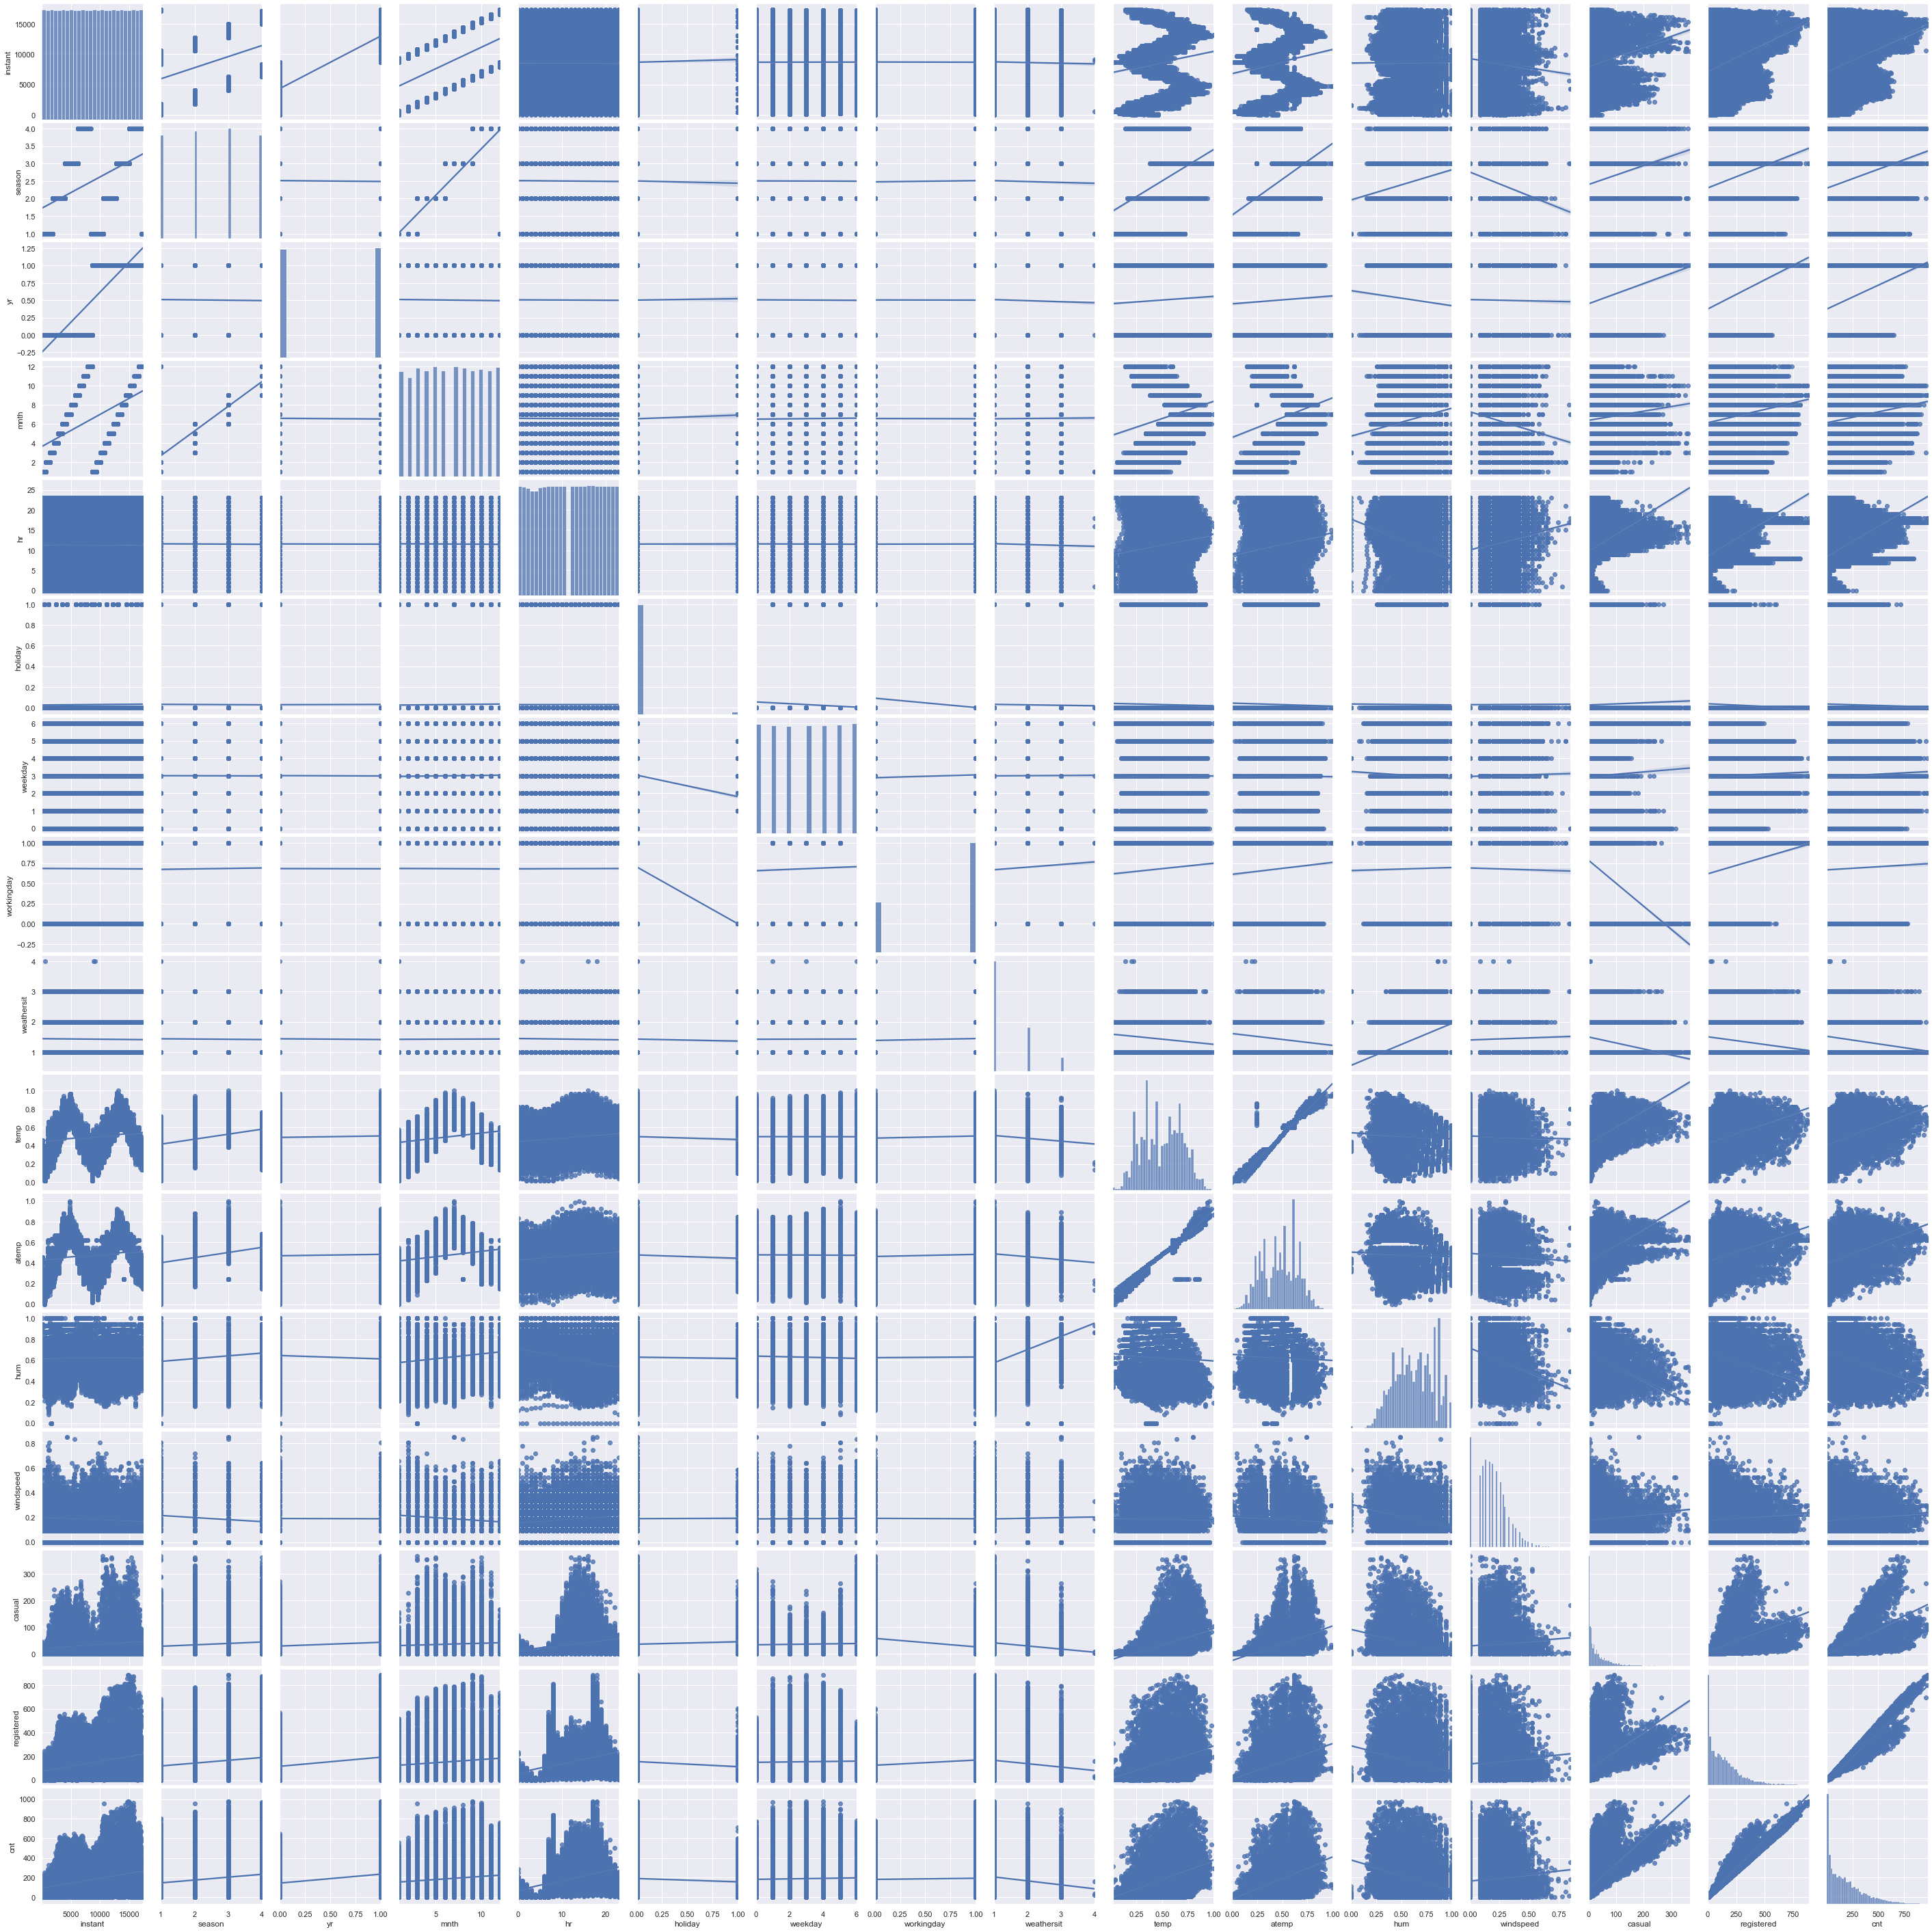

In [46]:
#Let us do a quick Visual Analysis on the data
sns.pairplot(hours_df,kind='reg')

array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

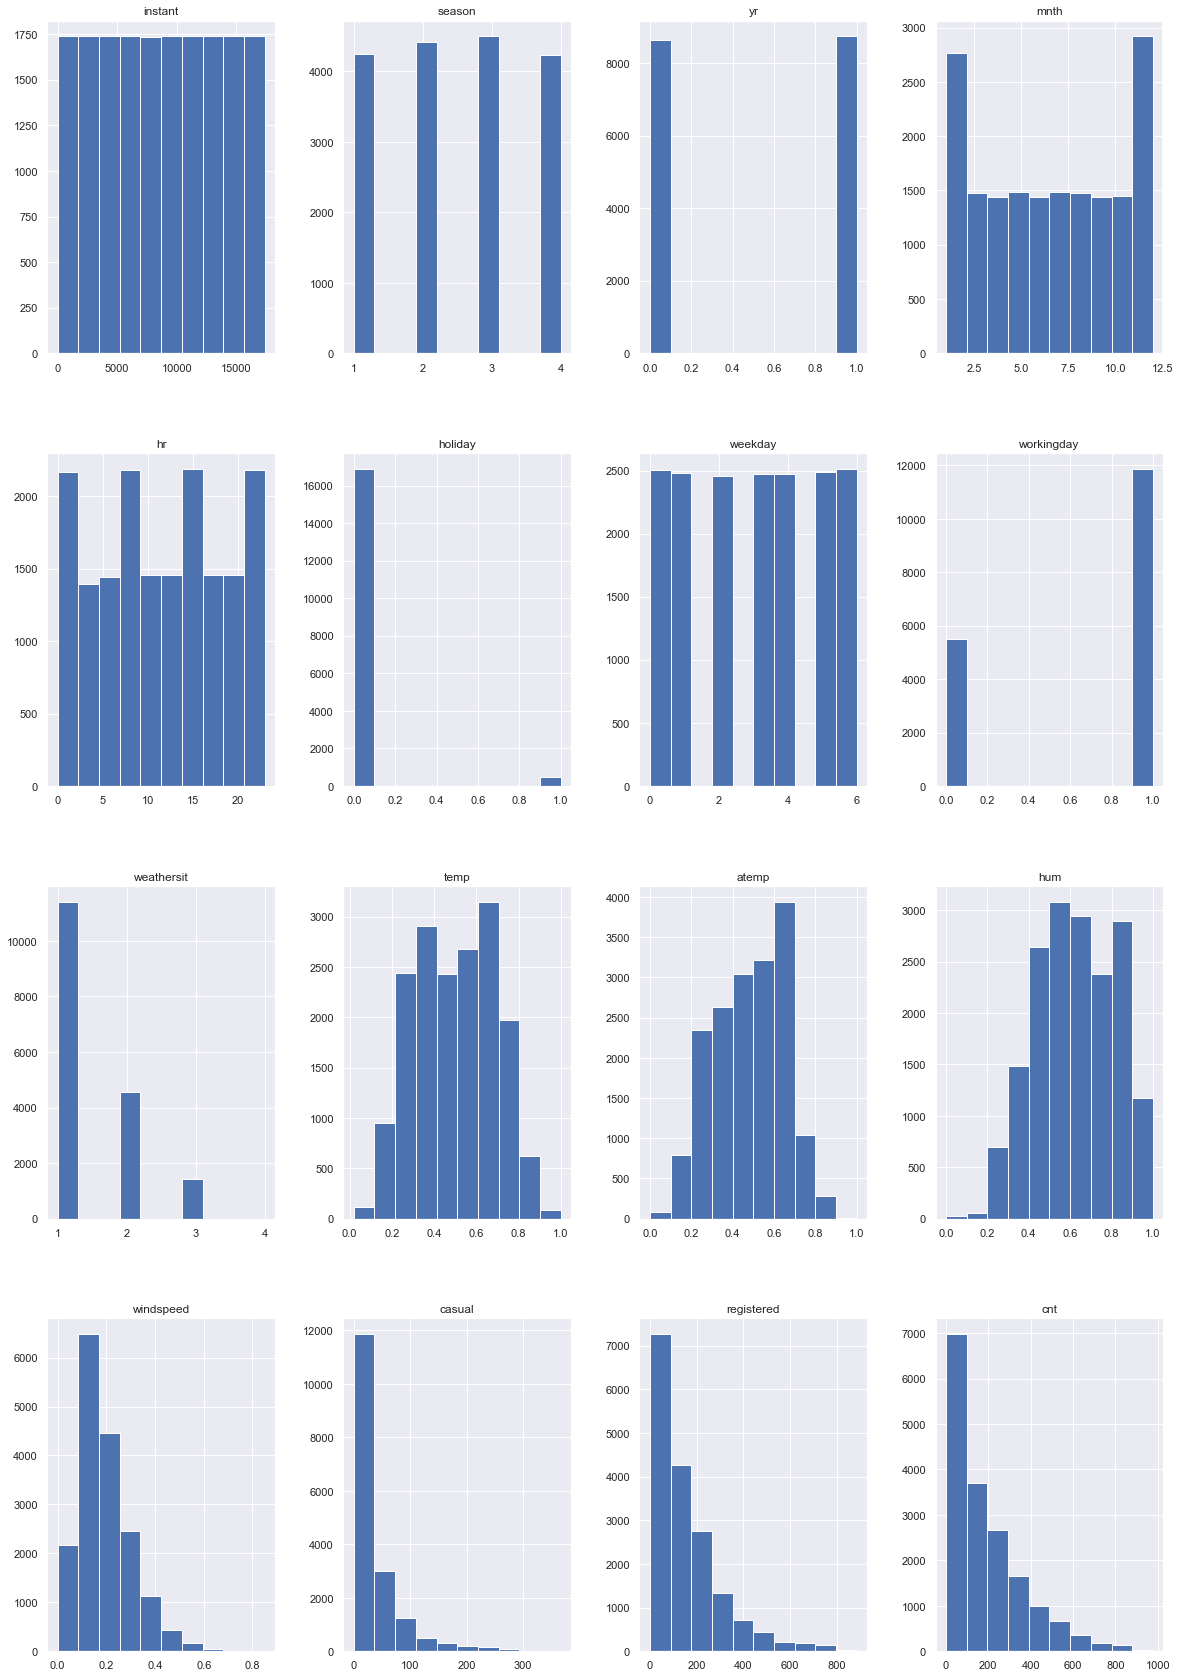

In [47]:
#Lets find the Histogram details
hours_df.hist(figsize=(20,30))

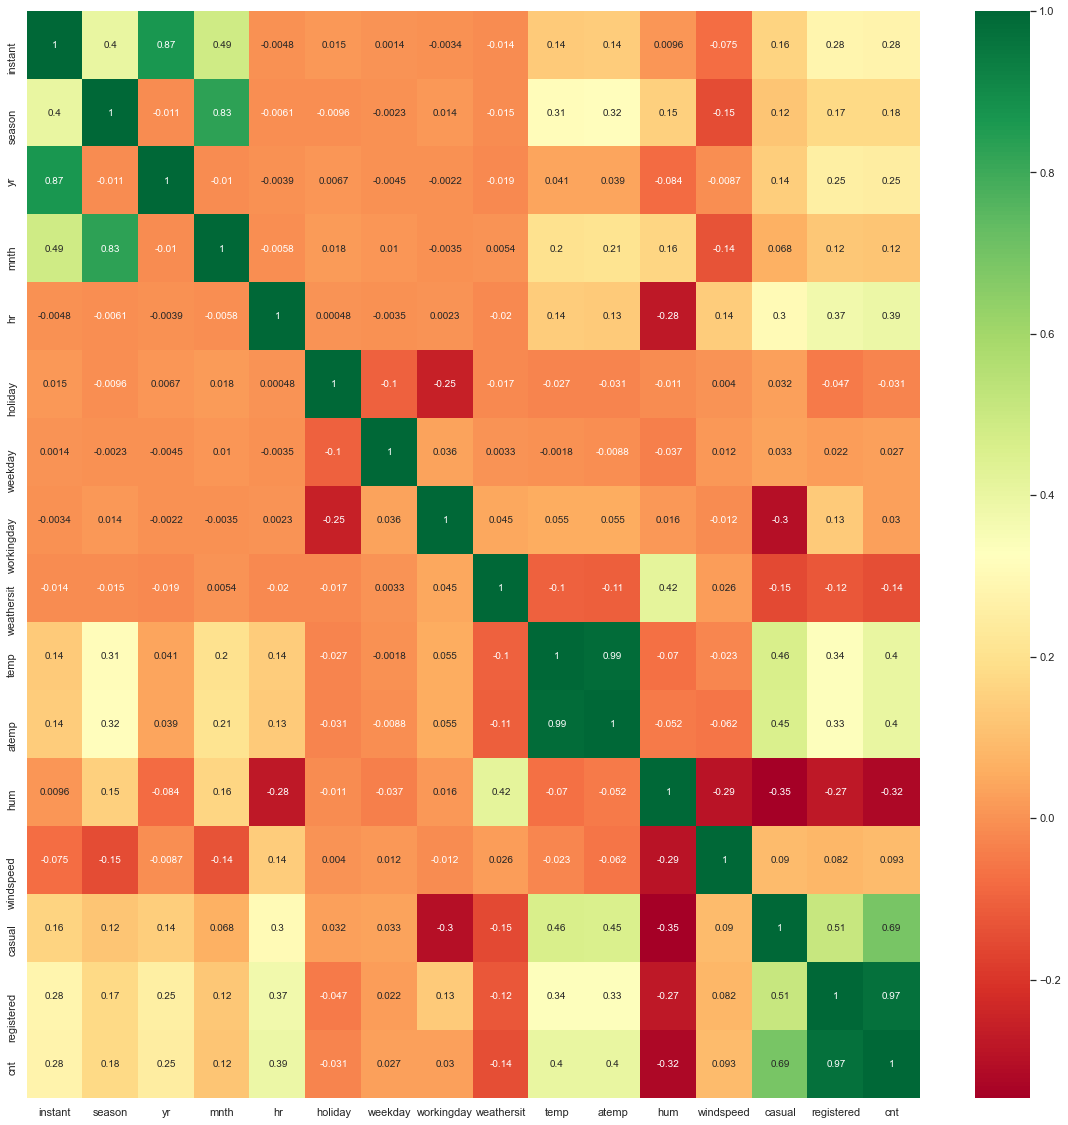

In [48]:
#get correlations of each features in dataset
corrmat = hours_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hours_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can clearly see there are some variables with high correlations in hour dataset. For Eg:-
1. year and instant
2. month and season
3. atemp and temp
4. casual and count
5. registered and count

<AxesSubplot:xlabel='cnt', ylabel='Density'>

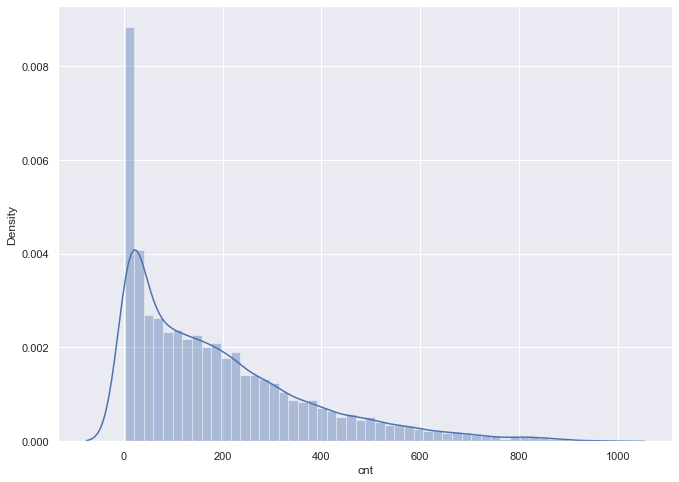

In [49]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.distplot(hours_df['cnt'],hist=True, kde=True)

Skewness is a measure of the symmetry in a distribution. It measures the amount of probability in the tails.

The value is often compared to the kurtosis of the normal distribution, which is equal to 3.

If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution


In [50]:
print("Skewness: %f" % hours_df['cnt'].skew())
print("Kurtosis: %f" % hours_df['cnt'].kurt())

Skewness: 1.277412
Kurtosis: 1.417203


In [51]:
from datetime import datetime
import calendar

In [52]:
#We can convert a string to datetime using strptime() function
hours_df['dteday'] = hours_df['dteday'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [53]:
#Converting to Columns

hours_df['Year'] = hours_df['dteday'].apply(lambda t: t.year)
hours_df['Month'] = hours_df['dteday'].apply(lambda t: calendar.month_name[t.month])

In [54]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,January
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,January
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,January
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,January
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,January


In [55]:
# As we have created Year and Month, we can remove few unwanted attributes like dteday,yr,mnth
#and also instant as it is not required for any prediction
hours_df.drop(columns={'dteday','yr','mnth','instant'},inplace=True)

In [56]:
hours_df.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,January
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,January
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,January
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,January
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,January


In [57]:
hours_df.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [58]:
hours_df.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

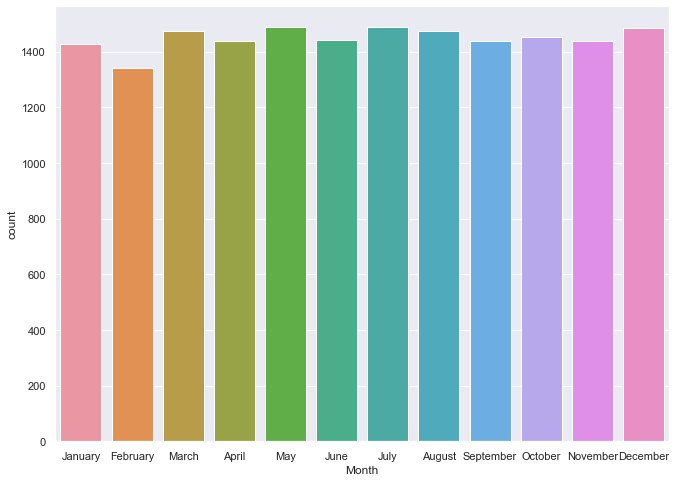

In [59]:
# Visualize Which Month count is more
sns.countplot(x='Month',data=hours_df)

In [60]:
#No Of calls in each month can be seen almost equal 

<AxesSubplot:xlabel='Year', ylabel='count'>

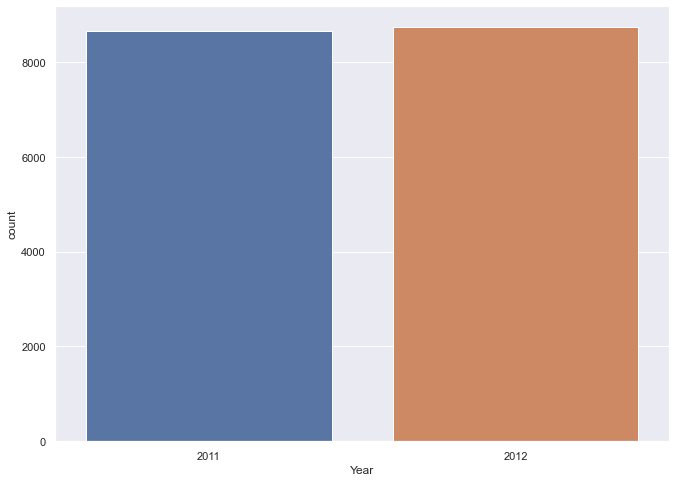

In [61]:
# Visualize Which Year count is more
sns.countplot(x='Year',data=hours_df)

In [62]:
#In both the years we can see equal no of counts

In [63]:
X=hours_df.iloc[:,0:12]
y=hours_df.iloc[:,12]

In [64]:
X.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [65]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [66]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [67]:
print(model.feature_importances_)

[2.98495385e-04 3.72464912e-02 3.17223904e-05 6.40662879e-05
 6.45189034e-03 3.03740462e-05 3.43753330e-03 3.04112639e-03
 6.34669818e-05 4.34438694e-05 1.38759310e-01 8.10532080e-01]


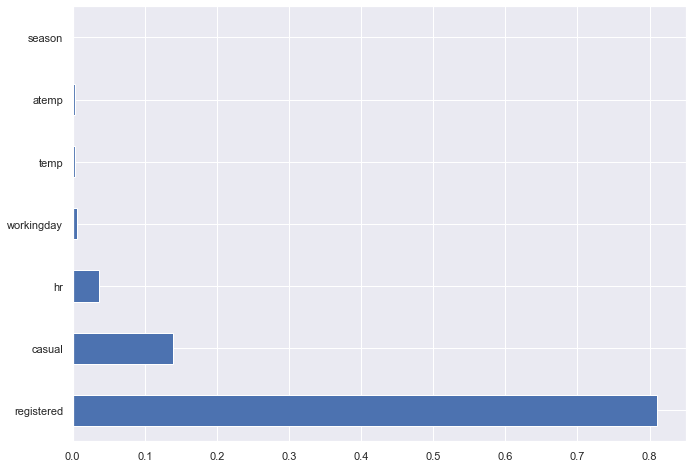

In [68]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In [171]:
X_train.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
11229,2,2,0,3,1,2,0.50,0.4848,0.42,0.1940,1,8
6334,4,12,0,1,1,2,0.68,0.6364,0.79,0.1642,48,161
11060,2,0,0,3,1,1,0.34,0.3030,0.36,0.4179,8,22
12346,2,15,0,0,0,1,0.70,0.6364,0.34,0.0000,236,408
15437,4,10,0,3,1,1,0.56,0.5303,0.52,0.2985,27,190


In [172]:
X_train.shape

(12165, 12)

In [202]:
len(X_train.keys())

12

In [159]:
y_train.head()

11229      9
6334     209
11060     30
12346    644
15437    217
Name: cnt, dtype: int64

In [228]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[12]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='tanh'),
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='sigmoid'), 
    layers.Dense(256, activation='sigmoid'),
    layers.Dropout(0.6),
    layers.Dense(512, activation='softplus'), 
    layers.Dense(512, activation='softplus'),
    layers.Dense(1,activation='linear')
  ])

  optimizer = tf.keras.optimizers.Adam()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [229]:
model = build_model()

In [220]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 64)                832       
_________________________________________________________________
dense_214 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_73 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_216 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_217 (Dense)            (None, 256)             

In [240]:
model.fit(X_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
48/48 [==============================] - 0s 6ms/step - loss: 36.5560 - accuracy: 0.0090
Epoch 2/200
48/48 [==============================] - 0s 6ms/step - loss: 39.9963 - accuracy: 0.0090
Epoch 3/200
48/48 [==============================] - 0s 6ms/step - loss: 46.5606 - accuracy: 0.0090
Epoch 4/200
48/48 [==============================] - 0s 6ms/step - loss: 42.9479 - accuracy: 0.0090
Epoch 5/200
48/48 [==============================] - 0s 6ms/step - loss: 48.0232 - accuracy: 0.0090
Epoch 6/200
48/48 [==============================] - 0s 6ms/step - loss: 45.4150 - accuracy: 0.0090
Epoch 7/200
48/48 [==============================] - 0s 6ms/step - loss: 56.4795 - accuracy: 0.0090
Epoch 8/200
48/48 [==============================] - 0s 6ms/step - loss: 40.0493 - accuracy: 0.0090
Epoch 9/200
48/48 [==============================] - 0s 6ms/step - loss: 166.6284 - accuracy: 0.0090
Epoch 10/200
48/48 [==============================] - 0s 6ms/step - loss: 58.6121 - accuracy: 0.009

48/48 [==============================] - 0s 6ms/step - loss: 44.3740 - accuracy: 0.0090
Epoch 83/200
48/48 [==============================] - 0s 6ms/step - loss: 37.1916 - accuracy: 0.0090
Epoch 84/200
48/48 [==============================] - 0s 6ms/step - loss: 39.8138 - accuracy: 0.0090
Epoch 85/200
48/48 [==============================] - 0s 6ms/step - loss: 49.8138 - accuracy: 0.0090
Epoch 86/200
48/48 [==============================] - 0s 6ms/step - loss: 36.6455 - accuracy: 0.0090
Epoch 87/200
48/48 [==============================] - 0s 6ms/step - loss: 30.8618 - accuracy: 0.0090
Epoch 88/200
48/48 [==============================] - 0s 6ms/step - loss: 42.7119 - accuracy: 0.0090
Epoch 89/200
48/48 [==============================] - 0s 6ms/step - loss: 39.1222 - accuracy: 0.0090
Epoch 90/200
48/48 [==============================] - 0s 6ms/step - loss: 33.5181 - accuracy: 0.0090
Epoch 91/200
48/48 [==============================] - 0s 5ms/step - loss: 77.8121 - accuracy: 0.0090
Epo

48/48 [==============================] - 0s 5ms/step - loss: 39.6363 - accuracy: 0.0090
Epoch 163/200
48/48 [==============================] - 0s 6ms/step - loss: 34.2923 - accuracy: 0.0090
Epoch 164/200
48/48 [==============================] - 0s 5ms/step - loss: 42.9237 - accuracy: 0.0090
Epoch 165/200
48/48 [==============================] - 0s 6ms/step - loss: 38.4648 - accuracy: 0.0090
Epoch 166/200
48/48 [==============================] - 0s 6ms/step - loss: 46.9188 - accuracy: 0.0090
Epoch 167/200
48/48 [==============================] - 0s 5ms/step - loss: 45.2588 - accuracy: 0.0090
Epoch 168/200
48/48 [==============================] - 0s 6ms/step - loss: 34.3821 - accuracy: 0.0090
Epoch 169/200
48/48 [==============================] - 0s 6ms/step - loss: 33.7701 - accuracy: 0.0090
Epoch 170/200
48/48 [==============================] - 0s 6ms/step - loss: 32.4285 - accuracy: 0.0090
Epoch 171/200
48/48 [==============================] - 0s 5ms/step - loss: 33.6363 - accuracy: 0

In [241]:
model.evaluate(X_test, y_test)

163/163 [==============================] - 0s 972us/step - loss: 400.2304 - accuracy: 0.0092


[400.2303771972656, 0.009205983951687813]

In [242]:
#Could not train a better model
#Need to know how to make a model for any regression problem